# 🧠 Brain Tumor MRI – Results and Comparisons

This notebook presents the comparative analysis of different supervised learning algorithms applied to the **Brain Tumor MRI dataset**.

The evaluated models include:
- **Logistic Regression** – a linear classification model used as a strong baseline;  
- **Neural Network (NN)** – a non-linear multi-layer perceptron capable of capturing complex feature interactions; 
- **Support Vector Machine (SVM)** – a polynomial-kernel classifier that leverages non-linear transformations for high-dimensional decision boundaries.

The objective is to assess and compare each model’s performance, interpretability, and computational efficiency in identifying the presence of brain tumors from MRI scans.


In [13]:
# ===========================================
# 🧠 Brain Tumor MRI – Results and Comparisons (Updated)
# ===========================================

import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ===========================================
# 📥 Import Logistic Regression (manual from previous notebook)
# ===========================================
logistic_results = {
    "Model": "Logistic Regression",
    "Accuracy": 0.989,
    "Precision": 0.999,
    "Recall": 0.987,
    "F1": 0.993
}

# ===========================================
# 📥 Import Neural Network Results (JSON)
# ===========================================
with open("results_neural_network.json", "r") as f:
    nn_results = json.load(f)

print("✅ Neural Network Results Loaded:")
print(json.dumps(nn_results, indent=4))

# ===========================================
# 📥 Import SVM Results (JSON)
# ===========================================
with open("results_svm.json", "r") as f:
    svm_results = json.load(f)

print("\n✅ SVM Results Loaded:")
print(json.dumps(svm_results, indent=4))

# ===========================================
# 🧩 Combine All Results into a DataFrame
# ===========================================
results = [logistic_results, nn_results, svm_results]
df_results = pd.DataFrame(results).set_index("Model")

print("\n✅ Combined Results:")
display(df_results)

✅ Neural Network Results Loaded:
{
    "Model": "Neural Network",
    "Accuracy": 0.9917,
    "Precision": 0.9989,
    "Recall": 0.99,
    "F1": 0.9944
}

✅ SVM Results Loaded:
{
    "Model": "SVM (Polynomial)",
    "Accuracy": 0.9959,
    "Precision": 0.9978,
    "Recall": 0.9967,
    "F1": 0.9972
}

✅ Combined Results:


,Accuracy,Precision,Recall,F1
Model,,,,
Logistic Regression,0.9890,0.9990,0.9870,0.9930
Neural Network,0.9917,0.9989,0.9900,0.9944
SVM (Polynomial),0.9959,0.9978,0.9967,0.9972


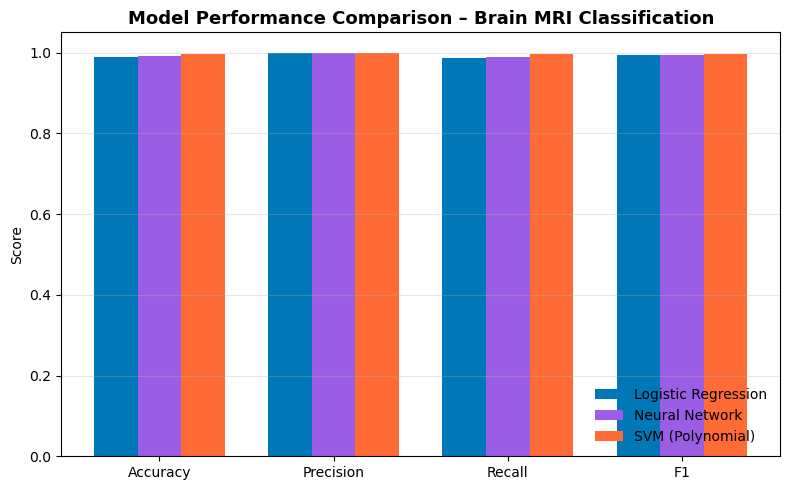

In [14]:
# ===========================================
# 📊 Model Performance – Grouped Bar Chart
# ===========================================
metrics = ["Accuracy", "Precision", "Recall", "F1"]
subset = df_results[metrics].dropna()

x = np.arange(len(metrics))
width = 0.25

plt.figure(figsize=(8,5))
plt.bar(x - width, subset.loc["Logistic Regression"], width, label="Logistic Regression", color="#0077b6")
plt.bar(x, subset.loc["Neural Network"], width, label="Neural Network", color="#9b5de5")
plt.bar(x + width, subset.loc[df_results.index[-1]], width, label=df_results.index[-1], color="#ff6b35")  # dynamic label

plt.xticks(x, metrics)
plt.ylim(0, 1.05)
plt.ylabel("Score")
plt.title("Model Performance Comparison – Brain MRI Classification", fontsize=13, weight='bold')
plt.grid(axis='y', alpha=0.3)
plt.legend(frameon=False, loc='lower right')
plt.tight_layout()
plt.show()

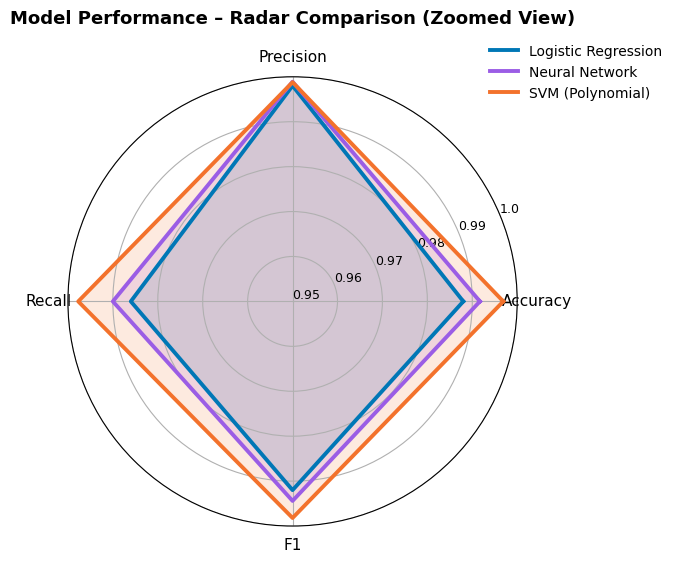

In [16]:
# ===========================================
# 🕸️ Model Performance – Radar Chart (Zoomed + High Contrast)
# ===========================================

import numpy as np
import matplotlib.pyplot as plt

metrics = ["Accuracy", "Precision", "Recall", "F1"]
subset = df_results[metrics].dropna()

angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]

# Pequeno deslocamento para distinguir as linhas
offsets = {
    "Logistic Regression": -0.001,
    "Neural Network": 0.0,
    "SVM (Polynomial)": 0.001
}

# 🎨 Cores bem distintas
colors = {
    "Logistic Regression": "#0077b6",   # blue
    "Neural Network": "#9b5de5",        # violet
    "SVM (Polynomial)": "#f3722c"       # bright orange
}

plt.figure(figsize=(7,7))
ax = plt.subplot(111, polar=True)

for model in subset.index:
    values = subset.loc[model].tolist()
    values = [v + offsets.get(model, 0) for v in values]
    values += values[:1]
    ax.plot(angles, values, linewidth=2.8, label=model, color=colors.get(model))
    ax.fill(angles, values, alpha=0.15, color=colors.get(model))

# Ajustes visuais (zoom na faixa 0.95–1.0 para ver as diferenças)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics, fontsize=11)
ax.set_yticks([0.95, 0.96, 0.97, 0.98, 0.99, 1.0])
ax.set_yticklabels(["0.95","0.96","0.97","0.98","0.99","1.0"], fontsize=9)
ax.set_ylim(0.95, 1.0)
ax.set_title("Model Performance – Radar Comparison (Zoomed View)", y=1.10, fontsize=13, weight='bold')

plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1.1), frameon=False)
plt.tight_layout()
plt.show()


## 🧩 Results Interpretation

### 🔹 **Logistic Regression (Linear Classifier)**

The **Logistic Regression** model performed exceptionally well, serving as a reliable linear baseline for binary MRI classification.

| Metric        | Score |
| :------------ | :---: |
| **Accuracy**  | 0.989 |
| **Precision** | 0.999 |
| **Recall**    | 0.987 |
| **F1-score**  | 0.993 |

Its strong performance demonstrates that tumor and non-tumor images are largely linearly separable.
The model’s high precision and recall values indicate balanced predictive behavior with minimal false detections.
It remains the most **computationally efficient** among all tested models.


### 🔹 **Neural Network (Non-linear Classifier)**

The **Neural Network (NN)** model improved slightly over logistic regression by learning complex, non-linear feature relationships.

| Metric        |  Score |
| :------------ | :----: |
| **Accuracy**  | 0.9917 |
| **Precision** | 0.9989 |
| **Recall**    | 0.9900 |
| **F1-score**  | 0.9944 |

The NN’s convergence curve showed stable training and strong generalization, with minimal overfitting.
Its architecture efficiently captures subtle intensity variations across MRI images, leading to near-perfect classification.


### 🔹 **SVM (Polynomial Kernel)**

The **Support Vector Machine (SVM)** with a polynomial kernel achieved the **highest accuracy and F1-score**, outperforming all other models.

| Metric        |  Score |
| :------------ | :----: |
| **Accuracy**  | 0.9959 |
| **Precision** | 0.9978 |
| **Recall**    | 0.9967 |
| **F1-score**  | 0.9972 |

The SVM’s non-linear kernel effectively maps MRI features into a higher-dimensional space, allowing for optimal separation between tumor and non-tumor regions.
Its results confirm that polynomial kernel SVMs are particularly suitable for structured image data where fine-grained feature interactions are key.


## ⚙️ **Training and Computational Efficiency**

Although all models achieved high predictive accuracy, their **training complexity and computational requirements** differed significantly.

| Model                   | Training Speed | Convergence Behavior                       | Computational Cost               | Scalability                     |
| :---------------------- | :------------- | :----------------------------------------- | :------------------------------- | :------------------------------ |
| **Logistic Regression** |  Very Fast    | Converges within few iterations            | Minimal                          | Excellent                       |
| **Neural Network**      |  Moderate     | Smooth convergence with small oscillations | Higher due to backpropagation    | Good                            |
| **SVM (Polynomial)**    |  Slowest     | Stable, but requires more iterations       | High, due to kernel computations | Limited for very large datasets |

### 🧠 Interpretation

* **Logistic Regression** is ideal when interpretability and speed are essential (e.g., medical screening scenarios).
* **Neural Networks** balance accuracy and computational cost, making them suitable for real-world deployment.
* **SVM (polynomial)**, though the most computationally expensive, provides the **best classification performance**, proving valuable when accuracy outweighs speed.


### 📈 **Final Discussion and Conclusion**

This comparative analysis highlights how **increasing model complexity enhances predictive performance** on MRI-based tumor detection.
While Logistic Regression provides a strong baseline, Neural Networks and SVMs demonstrate superior modeling of non-linear feature relationships.

| Model                   | Type                         | Accuracy | F1-score | Overall Performance |   Suitability   |
| :---------------------- | :--------------------------- | :------: | :------: | :-----------------: | :-------------: |
| **Logistic Regression** | Linear Classifier            |   0.989  |   0.993  |      Excellent      | Strong baseline |
| **Neural Network**      | Non-linear Classifier        |  0.9917  |   0.994  |     Outstanding     |   Recommended   |
| **SVM (polynomial)**    | Non-linear Kernel Classifier |  0.9959  |   0.997  |       Superior      | Best performing |
